In [632]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [633]:
#Loading the files
train = pd.read_csv("CPC_Assignment files/training_set.csv")
train.head()                

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [634]:
test = pd.read_csv("CPC_Assignment files/testing_set.csv")
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [635]:
train_original=train.copy()
test_original=test.copy()

In [636]:
list(train.columns)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'property_Area',
 'Loan_Status']

train.dtypes

In [638]:
train.shape

(614, 13)

In [639]:
percentage.index

Index(['Y', 'N'], dtype='object', name='Loan_Status')

In [640]:
percentage.values

array([68.72964169, 31.27035831])

<h><h>EDA

<h><h>UNIVARIATE ANALYSIS


Gender
Male      81.3
Female    18.7
Name: proportion, dtype: float64


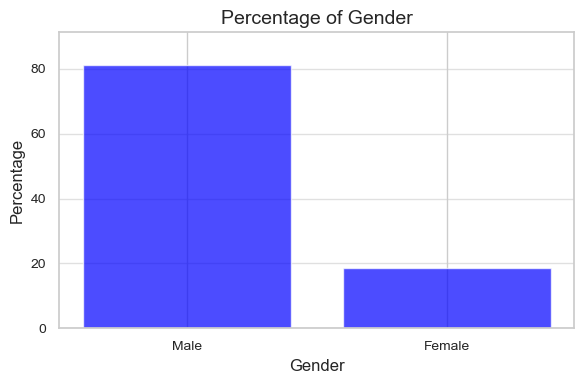

Married
Yes    65.14
No     34.86
Name: proportion, dtype: float64


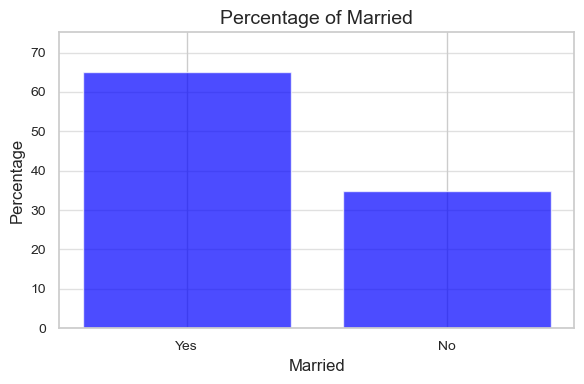

Dependents
0     57.60
1     17.03
2     16.86
3+     8.51
Name: proportion, dtype: float64


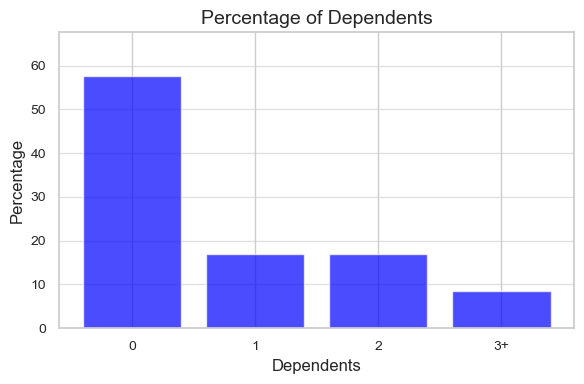

Education
Graduate        78.14
Not Graduate    21.86
Name: proportion, dtype: float64


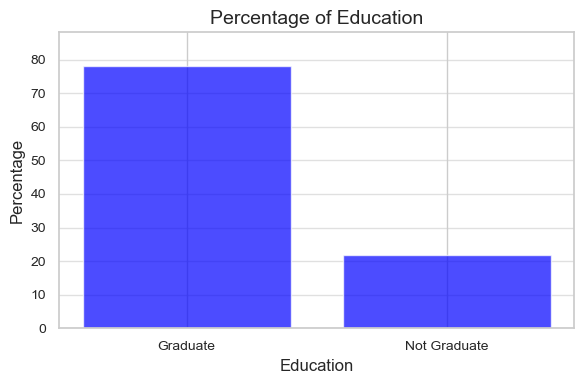

Self_Employed
No     85.91
Yes    14.09
Name: proportion, dtype: float64


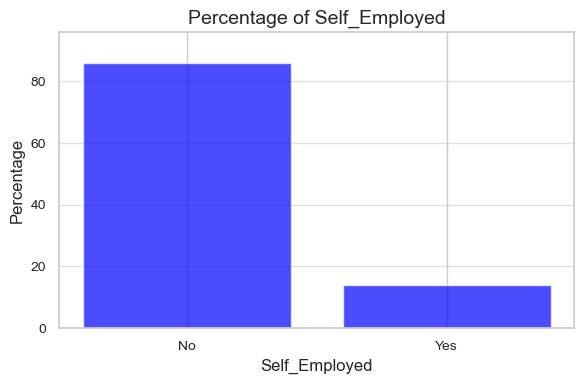

property_Area
Semiurban    37.95
Urban        32.90
Rural        29.15
Name: proportion, dtype: float64


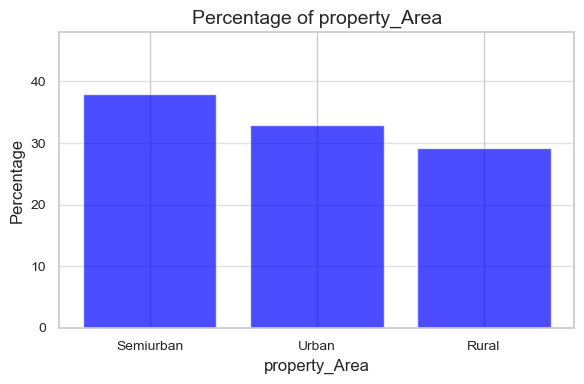

Loan_Status
Y    68.73
N    31.27
Name: proportion, dtype: float64


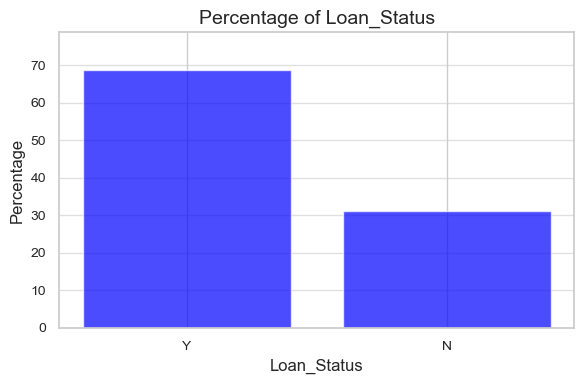

In [643]:
#Categorical Features
import matplotlib.pyplot as plt

# List of categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area', 'Loan_Status']

# Plot each column separately
for col in categorical_cols:
    percentages = round(train[col].value_counts(normalize=True) * 100,2)  # Calculate percentages
    plt.figure(figsize=(6, 4))
    plt.bar(percentages.index, percentages.values, color='blue', alpha=0.7)
    print(percentages)
    plt.title(f'Percentage of {col}', fontsize=14)
    plt.ylabel('Percentage', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.ylim(0, percentages.values.max() + 10)  # Add padding to the y-axis
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(axis='y', alpha=0.6)
    plt.tight_layout()
    plt.show()


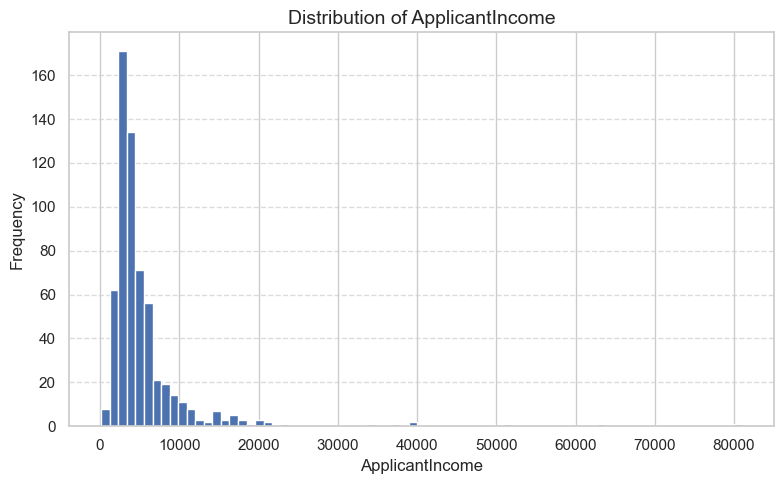

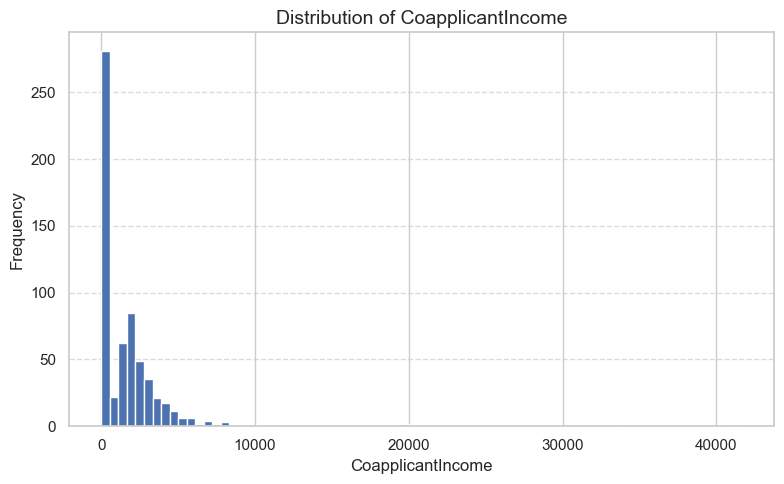

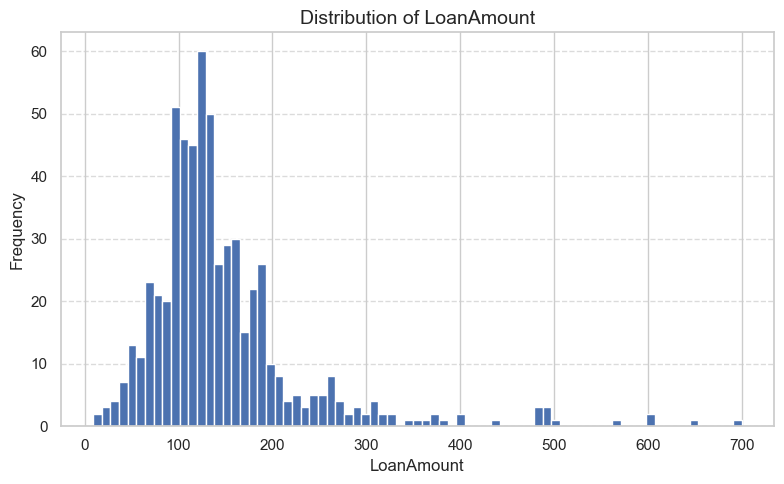

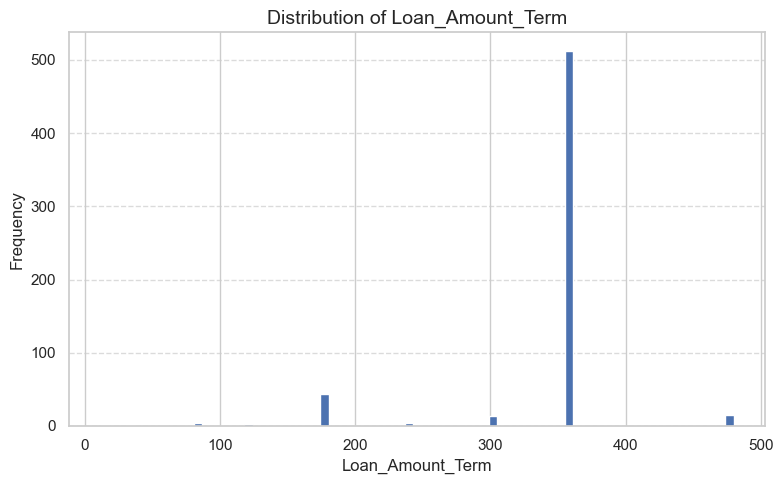

In [644]:
#Numerical features
import matplotlib.pyplot as plt
import pandas as pd

# List of numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Iterate through each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))  # Create a new figure for each column
    plt.hist(train[col].dropna(), bins=75)  # Histogram for the column
    plt.title(f'Distribution of {col}', fontsize=14)  # Add a title
    plt.xlabel(col, fontsize=12)  # Label the x-axis
    plt.ylabel('Frequency', fontsize=12)  # Label the y-axis
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to y-axis for better readability
    plt.tight_layout()  # Adjust layout to avoid overlaps
    plt.show()  # Display the plot


<h><h>BIVARIATE ANALYSIS

Loan_Status      N      Y
Gender                   
Female       33.04  66.96
Male         30.80  69.20


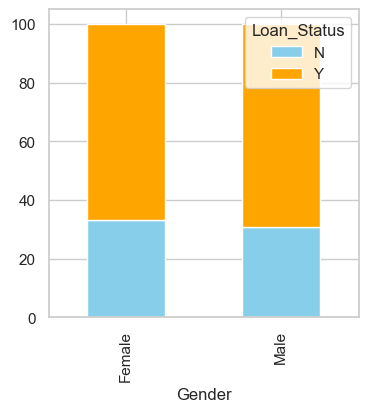

Loan_Status     N     Y
Married                
No           0.37  0.63
Yes          0.28  0.72


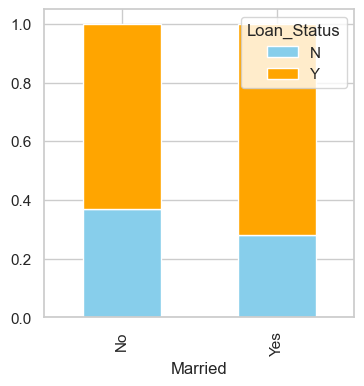

Loan_Status     N     Y
Dependents             
0            0.31  0.69
1            0.35  0.65
2            0.25  0.75
3+           0.35  0.65


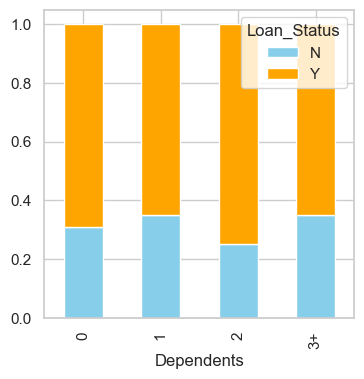

Loan_Status      N     Y
Education               
Graduate      0.29  0.71
Not Graduate  0.39  0.61


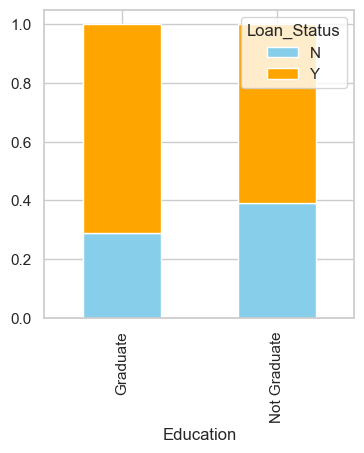

Loan_Status       N     Y
Self_Employed            
No             0.31  0.69
Yes            0.32  0.68


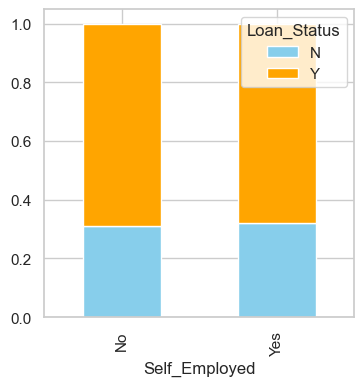

In [646]:
#Categorical Features

Gender = round(pd.crosstab(train['Gender'], train['Loan_Status'], normalize='index')*100,2)
print(Gender)
Gender.plot.bar(stacked=True, figsize=(4, 4),color=['skyblue', 'orange'])
plt.show()
Married=round(pd.crosstab(train['Married'],train['Loan_Status'], normalize='index'),2)
print(Married)
Married.plot.bar(stacked=True, figsize=(4, 4),color=['skyblue', 'orange'])
plt.show()
Dependents=round(pd.crosstab(train['Dependents'],train['Loan_Status'], normalize='index'),2)
print(Dependents)
Dependents.plot.bar(stacked=True, figsize=(4, 4),color=['skyblue', 'orange'])
plt.show()
Education=round(pd.crosstab(train['Education'],train['Loan_Status'], normalize='index'),2)
print(Education)
Education.plot.bar(stacked=True, figsize=(4, 4),color=['skyblue', 'orange'])
plt.show()
Self_Employed=round(pd.crosstab(train['Self_Employed'],train['Loan_Status'], normalize='index'),2)
print(Self_Employed)
Self_Employed.plot.bar(stacked=True, figsize=(4, 4),color=['skyblue', 'orange'])
plt.show()

In [647]:
print(train['Credit_History'].min())
print(train['Credit_History'].max())

0.0
1.0


Loan_Status                 N       Y
ApplicantIncome_Binned               
Low                     31.35   68.65
Moderate                27.78   72.22
Medium                  25.00   75.00
High                     0.00  100.00
Very High               50.00   50.00


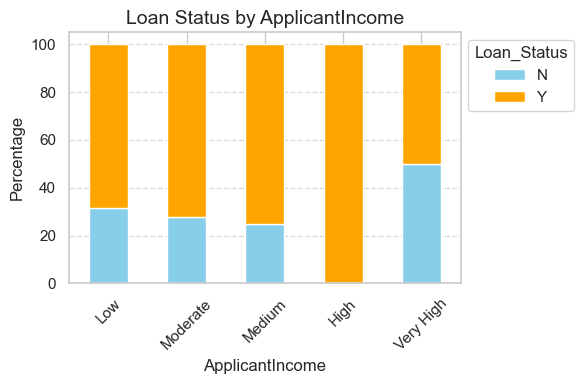

Loan_Status                    N      Y
CoapplicantIncome_Binned               
Low                        27.33  72.67
Moderate                   66.67  33.33
Medium                     50.00  50.00
Very High                 100.00   0.00


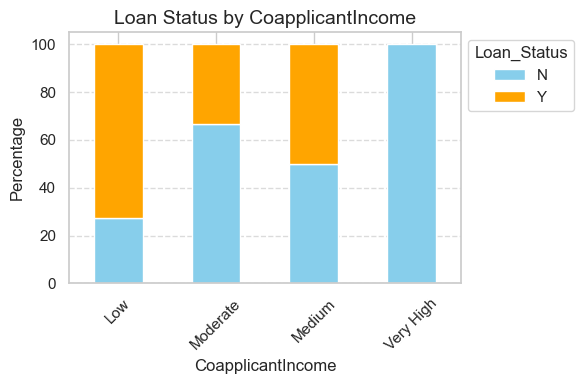

Loan_Status            N      Y
LoanAmount_Binned              
Low                28.73  71.27
Moderate           32.28  67.72
Medium             47.62  52.38
High               30.77  69.23


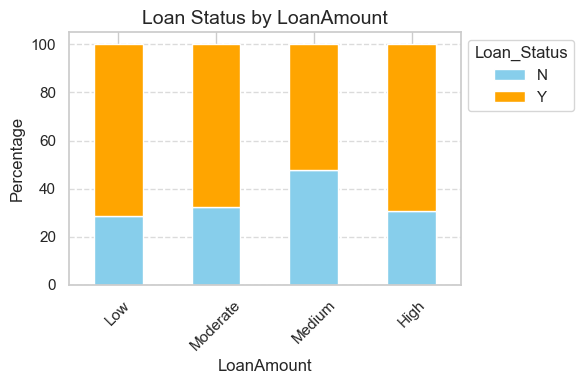

Loan_Status                  N      Y
Loan_Amount_Term_Binned              
Very Short               33.33  66.67
Short                    31.91  68.09
Medium                   35.29  64.71
Long                     29.88  70.12
Very Long                60.00  40.00


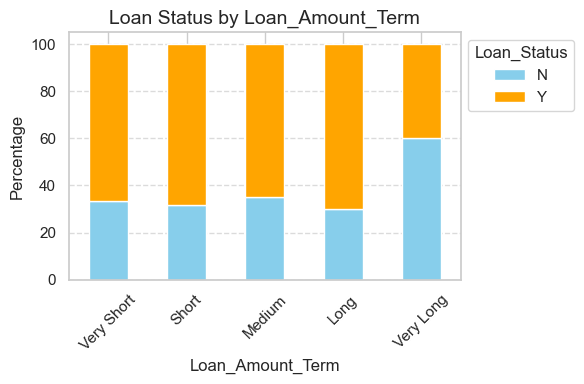

Loan_Status                N      Y
Credit_History_Binned              
Bad                    92.13   7.87
Good                   20.42  79.58


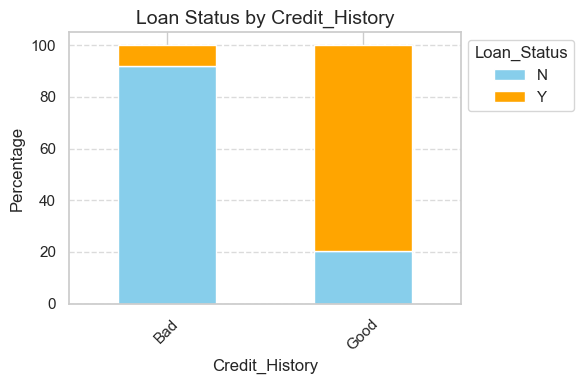

In [648]:
import pandas as pd
import matplotlib.pyplot as plt

# List of numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Define bins and labels for binning the numerical columns
bin_config = {
    'ApplicantIncome': {'bins': [0, 15000, 30000, 45000, 60000, train['ApplicantIncome'].max()],
                        'labels': ['Low', 'Moderate', 'Medium', 'High', 'Very High']},
    'CoapplicantIncome': {'bins': [0, 8400, 16800 , 25200, 33600 , train['CoapplicantIncome'].max()],
                          'labels': ['Low', 'Moderate', 'Medium', 'High', 'Very High']},
    'LoanAmount': {'bins': [0, 140, 280, 420, 700],
                   'labels': ['Low', 'Moderate', 'Medium', 'High']},
    'Loan_Amount_Term': {'bins': [0, 100, 200, 300, 400, train['Loan_Amount_Term'].max()],
                         'labels': ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']},
    'Credit_History': {'bins': [-1, 0.5, 1.5],
                       'labels': ['Bad', 'Good']}
}

# Iterate through each numerical column
for col in numerical_cols:
    # Bin the data based on the configuration
    train[col + '_Binned'] = pd.cut(train[col], bins=bin_config[col]['bins'], labels=bin_config[col]['labels'])
    
    # Calculate percentage Loan_Status for each bin
    binned_data = round(pd.crosstab(train[col + '_Binned'], train['Loan_Status'], normalize='index') * 100,2)
    print(binned_data)
    
    # Plot stacked bar chart
    binned_data.plot.bar(stacked=True, figsize=(6, 4), color=['skyblue', 'orange'])
    plt.title(f'Loan Status by {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    
    plt.ylabel('Percentage', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Loan_Status', bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()


In [649]:
train=train.drop(['ApplicantIncome_Binned', 'CoapplicantIncome_Binned', 'LoanAmount_Binned', 'Loan_Amount_Term_Binned', 'Credit_History_Binned'], axis=1)
train.isnull().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [650]:
#Filling the Categorical missing values of the training set using the mode of the respective column
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area', 'Loan_Status','Loan_Amount_Term']
mode_values = train[categorical_columns].mode().iloc[0] #to handle the scenario where there could be multiple modes (most frequent values) for a column.
print(mode_values)
train[categorical_columns] = train[categorical_columns].fillna(mode_values)

Gender                   Male
Married                   Yes
Dependents                  0
Education            Graduate
Self_Employed              No
property_Area       Semiurban
Loan_Status                 Y
Loan_Amount_Term        360.0
Name: 0, dtype: object


In [651]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

In [652]:
#Filling the Numerical missing values of the training set using linear interpolation of the respective column
train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']] = train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']].interpolate(method='linear')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4424.5,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [653]:
train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           1
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

In [654]:
train.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4424.5,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [655]:
#Filling the Categorical missing values of the test set using the mode of the respective column

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area','Loan_Amount_Term']
mode_values = test[categorical_columns].mode().iloc[0] #to handle the scenario where there could be multiple modes (most frequent values) for a column.
print(mode_values)
test[categorical_columns] = train[categorical_columns].fillna(mode_values)
test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']] = test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']].interpolate(method='linear')
test

Gender                  Male
Married                  Yes
Dependents                 0
Education           Graduate
Self_Employed             No
property_Area          Urban
Loan_Amount_Term       360.0
Name: 0, dtype: object


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area
0,LP001015,Male,No,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Rural
2,LP001031,Male,Yes,0,Graduate,Yes,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,0,Not Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,0,Graduate,No,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,300.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,Yes,3250,1993,126.0,360.0,1.0,Rural
365,LP002986,Male,No,0,Not Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [656]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
dtype: int64

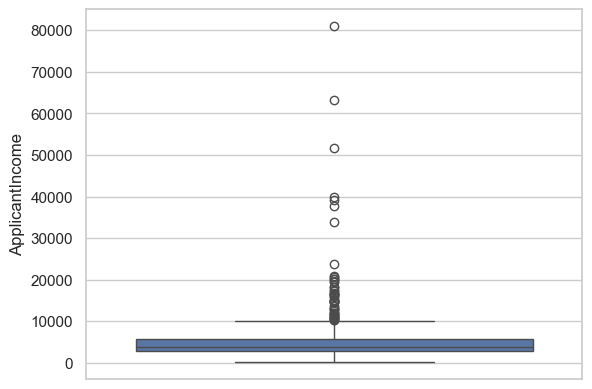

In [657]:
sns.boxplot(train['ApplicantIncome'])
plt.show()

In [658]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
property_Area         object
Loan_Status           object
dtype: object

In [659]:
#Converting the Categorical to Numerical columns
train.Loan_Status = train.Loan_Status.replace({"Y": 1, "N" : 0})

train.Gender = train.Gender.replace({"Male": 1, "Female" : 0})
test.Gender = test.Gender.replace({"Male": 1, "Female" : 0})

train.Married = train.Married.replace({"Yes": 1, "No" : 0})
test.Married = test.Married.replace({"Yes": 1, "No" : 0})

train.Self_Employed = train.Self_Employed.replace({"Yes": 1, "No" : 0})
test.Self_Employed = test.Self_Employed.replace({"Yes": 1, "No" : 0})

train.Education = train.Education.replace({"Graduate": 1, "Not Graduate" : 0})
test.Education = test.Education.replace({"Graduate": 1, "Not Graduate" : 0})


train['Dependents'].replace('3+', 3, inplace=True)
train['Dependents'].astype(int)
test['Dependents'].replace('3+', 3, inplace=True)
test['Dependents'].astype(int)

category_mapping = {'Rural': 0, 'Semiurban': 1, 'Urban': 2}

# Apply the mapping
train['property_Area'] = train['property_Area'].map(category_mapping)
test['property_Area'] = test['property_Area'].map(category_mapping)


In [660]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.0,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4424.5,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900.0,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,1,0,4106.0,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072.0,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583.0,0.0,187.0,360.0,1.0,2,1


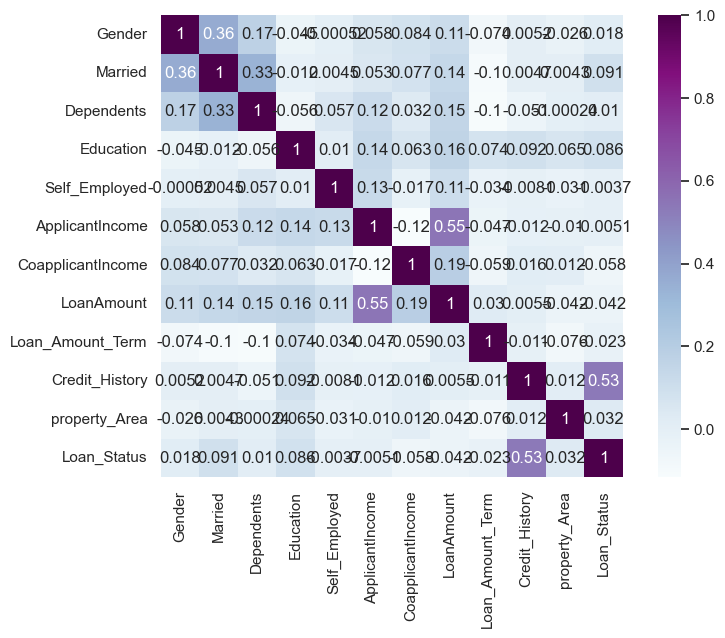

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,-0.045364,-0.000525,0.058462,0.083525,0.114025,-0.074030,0.005170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,-0.012304,0.004489,0.052584,0.076932,0.136852,-0.100912,0.004654,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,-0.055752,0.056798,0.118661,0.032183,0.151862,-0.103864,-0.050734,-0.000244,0.010118
Education,-0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140358,0.062998,0.161403,0.073928,0.091928,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.056798,0.010383,1.000000,0.127434,-0.016648,0.108723,-0.033739,-0.008136,-0.030860,-0.003700
ApplicantIncome,0.058462,0.052584,0.118661,0.140358,0.127434,1.000000,-0.116803,0.548300,-0.046716,-0.012469,-0.010259,-0.005096
CoapplicantIncome,0.083525,0.076932,0.032183,0.062998,-0.016648,-0.116803,1.000000,0.190539,-0.058950,0.015739,0.012259,-0.058182
LoanAmount,0.114025,0.136852,0.151862,0.161403,0.108723,0.548300,0.190539,1.000000,0.029733,0.005479,-0.041760,-0.042033
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,0.073928,-0.033739,-0.046716,-0.058950,0.029733,1.000000,-0.011339,-0.076120,-0.022549
Credit_History,0.005170,0.004654,-0.050734,0.091928,-0.008136,-0.012469,0.015739,0.005479,-0.011339,1.000000,0.011738,0.533825


In [661]:
#Correlation
# drop Loan_ID 
train = train.drop('Loan_ID', axis=1)
test = test.drop('Loan_ID', axis=1)
# calculate and visualize correlation matrix
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)
plt.show()
matrix

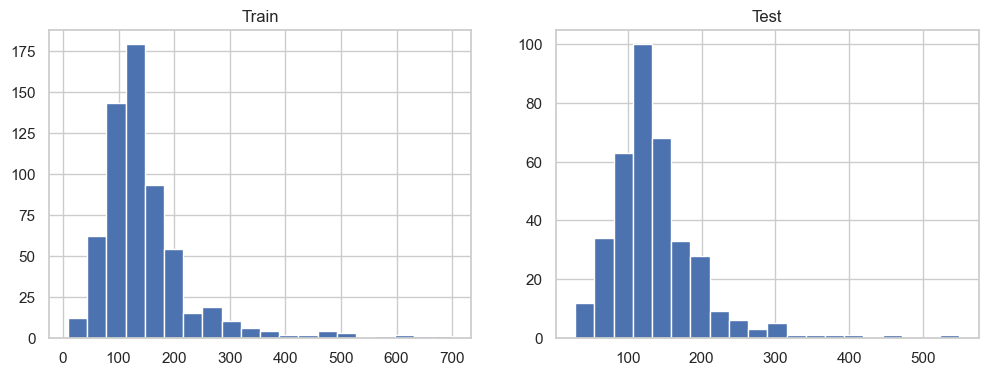

In [662]:
# before log transformation

ax1 = plt.subplot(121)
train['LoanAmount'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount'].hist(bins=20)
ax2.set_title("Test")

plt.show()

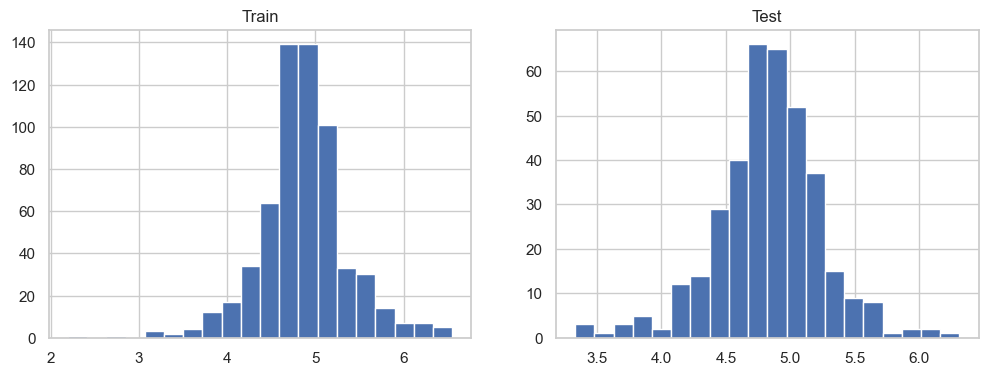

In [663]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

# after log transformation

ax1 = plt.subplot(121)
train['LoanAmount_log'].hist(bins=20, figsize=(12,4))
ax1.set_title("Train")

ax2 = plt.subplot(122)
test['LoanAmount_log'].hist(bins=20)
ax2.set_title("Test")

plt.show()

<h><h>MODAL BUILDING

In [665]:
# import library
from sklearn.model_selection import train_test_split

x=train[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','property_Area','LoanAmount_log']]
y=train['Loan_Status']
# split the data into train and cross validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=0)

print(f"Training features shape: {x_train.shape}")
print(f"Validation features shape: {x_val.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Validation target shape: {y_val.shape}")

Training features shape: (429, 12)
Validation features shape: (185, 12)
Training target shape: (429,)
Validation target shape: (185,)


In [666]:
train.dropna()
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,LoanAmount_log
0,1,0,0,1,0,5849.0,0.0,NaN,360.0,1.0,2,1,NaN
1,1,1,1,1,0,4424.5,1508.0,128.0,360.0,1.0,0,0,4.852030
2,1,1,0,1,1,3000.0,0.0,66.0,360.0,1.0,2,1,4.189655
3,1,1,0,0,0,2583.0,2358.0,120.0,360.0,1.0,2,1,4.787492
4,1,0,0,1,0,6000.0,0.0,141.0,360.0,1.0,2,1,4.948760
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900.0,0.0,71.0,360.0,1.0,0,1,4.262680
610,1,1,3,1,0,4106.0,0.0,40.0,180.0,1.0,0,1,3.688879
611,1,1,1,1,0,8072.0,240.0,253.0,360.0,1.0,2,1,5.533389
612,1,1,2,1,0,7583.0,0.0,187.0,360.0,1.0,2,1,5.231109


<h><h>LOGISTIC REGRESSION

Feature Importance:
              Feature  Importance
9      Credit_History    2.414382
3           Education    0.514180
1             Married    0.395631
2          Dependents    0.101009
10      property_Area    0.095556
5     ApplicantIncome    0.000007
6   CoapplicantIncome   -0.000074
7          LoanAmount   -0.002811
8    Loan_Amount_Term   -0.003444
0              Gender   -0.008712
4       Self_Employed   -0.023567
11     LoanAmount_log   -0.071160


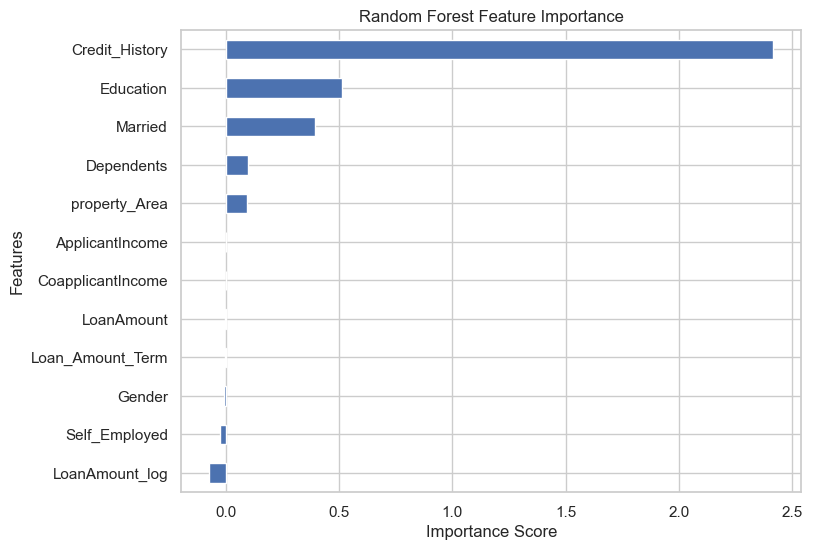

In [668]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# fit the model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

# Extract feature importance
feature_importance_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': lr_model.coef_[0]
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_lr)

# Plot feature importance
feature_importance_lr.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(8, 6))
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

In [669]:
x_val, y_val = x_val.dropna(), y_val[x_val.index.isin(x_val.dropna().index)]


In [670]:
x_val

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,LoanAmount_log
454,1,0,0,1,1,7085.0,0.0,84.0,360.0,1.0,1,4.430817
52,0,0,0,1,0,4230.0,0.0,112.0,360.0,1.0,1,4.718499
536,1,1,0,1,0,6133.0,3906.0,324.0,360.0,1.0,2,5.780744
469,1,1,0,1,0,4333.0,2451.0,110.0,360.0,1.0,2,4.700480
55,1,1,2,1,0,2708.0,1167.0,97.0,360.0,1.0,1,4.574711
...,...,...,...,...,...,...,...,...,...,...,...,...
242,1,0,0,1,0,2965.0,5701.0,155.0,60.0,1.0,2,5.043425
515,1,1,3,1,0,3466.0,3428.0,150.0,360.0,1.0,0,5.010635
582,0,1,0,1,0,3166.0,0.0,36.0,360.0,1.0,1,3.583519
225,1,1,0,1,0,3250.0,0.0,170.0,360.0,1.0,0,5.135798


In [671]:
y_val

454    1
52     0
536    1
469    0
55     1
      ..
242    1
515    1
582    1
225    0
134    1
Name: Loan_Status, Length: 184, dtype: int64

In [672]:
# make prediction
pred_cv = lr_model.predict(x_val)
# calculate accuracy score
round(accuracy_score(y_val, pred_cv),2)

0.84

[[ 25  26]
 [  3 130]]


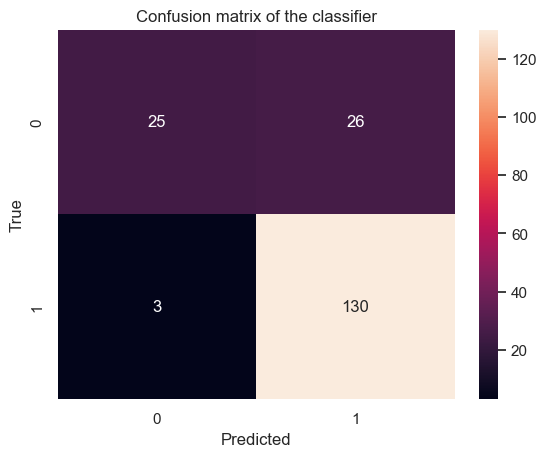

In [673]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_val, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.49      0.63        51
           1       0.83      0.98      0.90       133

    accuracy                           0.84       184
   macro avg       0.86      0.73      0.77       184
weighted avg       0.85      0.84      0.83       184

AUC Score: 0.7568922305764411


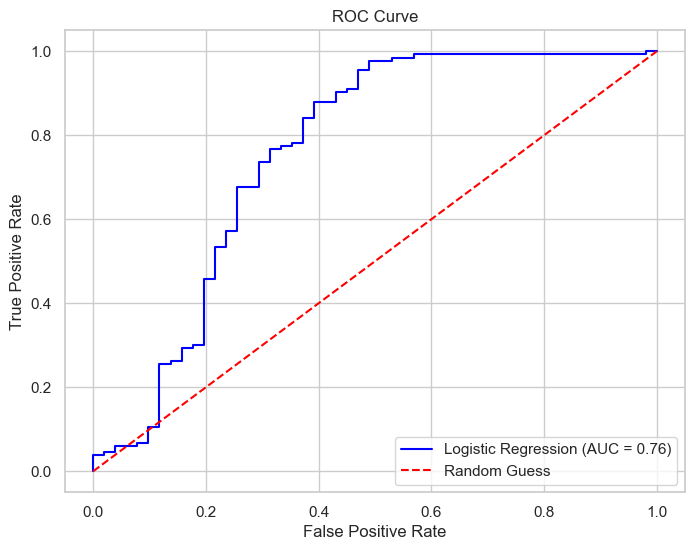

In [674]:
#Evaluation Metrics
from sklearn.metrics import roc_curve, roc_auc_score
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_cv))
# Get predicted probabilities for ROC curve
probs_lr = lr_model.predict_proba(x_val)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, probs_lr)
auc_score = roc_auc_score(y_val, probs_lr)
print(f"AUC Score: {auc_score}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [675]:
# make prediction on test set
pred_test_lr = lr_model.predict(test)
# take a look at the prediction
pred_test_lr

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

Fitting 5 folds for each of 720 candidates, totalling 3600 fits

Best Parameters: {'C': 0.1, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.79

Random Forest Results After Grid Search
Accuracy: 0.84
Confusion Matrix:
 [[ 24  27]
 [  2 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.47      0.62        51
           1       0.83      0.98      0.90       133

    accuracy                           0.84       184
   macro avg       0.88      0.73      0.76       184
weighted avg       0.86      0.84      0.82       184



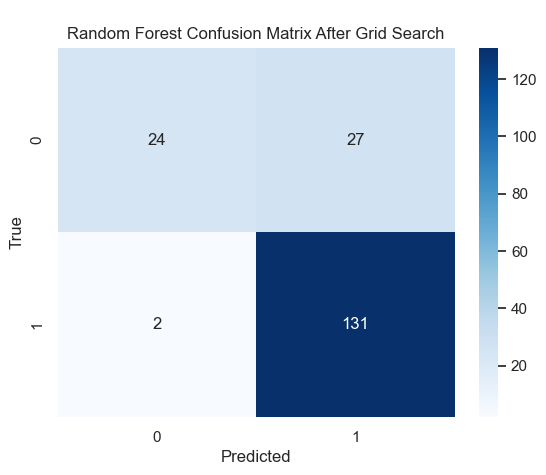

In [676]:
#Hyper-parameter Tuning
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],                  # Inverse of regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga'],  # Optimization solvers
    'max_iter': [100, 200, 300],                    # Maximum iterations
    'l1_ratio': [0.1, 0.5, 0.9]                     # Only applicable for 'elasticnet' penalty
}
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV on training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest Parameters:", best_params)
print("Best Cross-Validation Accuracy:", round(best_score,2))
# Use the best model for predictions
best_lr_model = grid_search.best_estimator_
y_pred_lr = best_lr_model.predict(x_val)

# Evaluate the model
print("\nRandom Forest Results After Grid Search")
print("Accuracy:", round(accuracy_score(y_val, y_pred_lr),2))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_val, y_pred_lr))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('\nRandom Forest Confusion Matrix After Grid Search')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [677]:
#Predicition using Hyper-parameter tuned Random Forest model
best_lr_model.fit(x_train, y_train)
pred_test_lr=best_lr_model.predict(test)
# make prediction on test set
print("Accuracy:", round(accuracy_score(y_val, y_pred_lr),2))
# take a look at the prediction
print(pred_test_lr)

Accuracy: 0.84
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


R² (Coefficient of Determination): 0.2133
Mean Absolute Error (MAE): 0.1576
Mean Squared Error (MSE): 0.1576
Root Mean Squared Error (RMSE): 0.3970


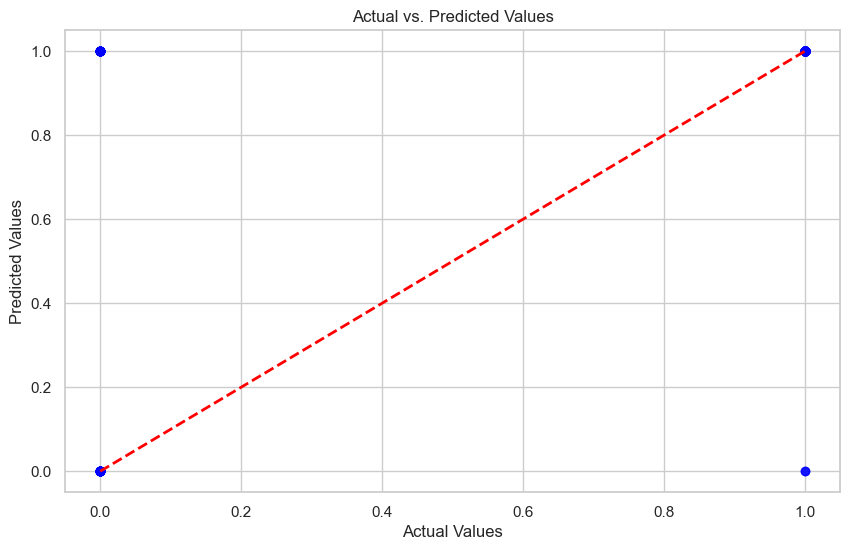

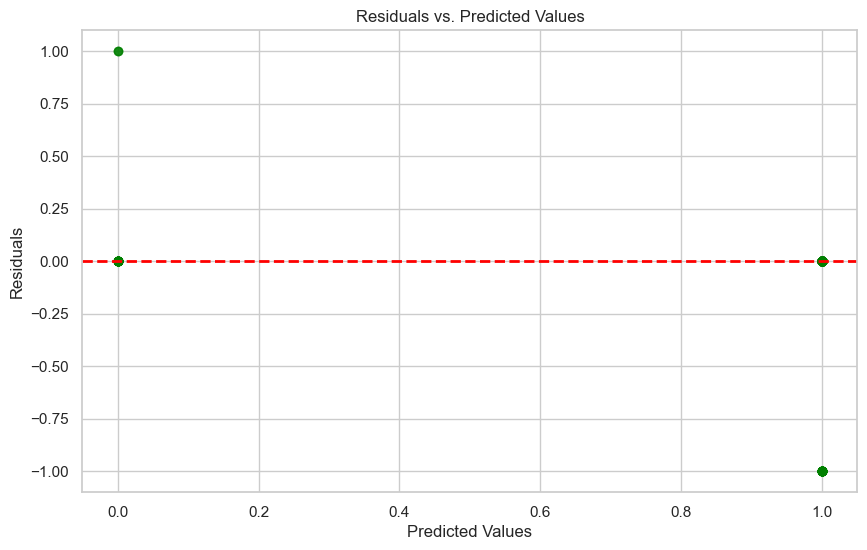

In [678]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error

# Evaluation Metrics
r2 = r2_score(y_val, y_pred_lr)
mae = mean_absolute_error(y_val, y_pred_lr)
mse = mean_squared_error(y_val, y_pred_lr)
rmse = np.sqrt(mse)

# Print Metrics
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_lr, alpha=0.7, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot Residuals
residuals = y_val - y_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


<h><h>RANDOM FOREST

Accuracy:  0.8
              precision    recall  f1-score   support

           0       0.89      0.49      0.63        51
           1       0.83      0.98      0.90       133

    accuracy                           0.84       184
   macro avg       0.86      0.73      0.77       184
weighted avg       0.85      0.84      0.83       184

AUC Score: 0.7763526463216865


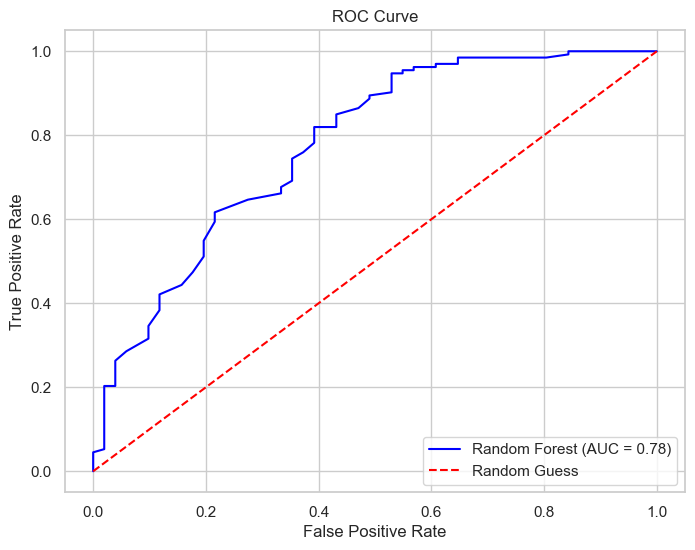

[1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [680]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define the model
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(x_train, y_train)

# make prediction
pred_cv_rf = rf_model.predict(x_val)
# calculate accuracy score
print("Accuracy: ",round(accuracy_score(y_val, pred_cv_rf),2))
print(classification_report(y_val, pred_cv))

# Get predicted probabilities for ROC curve
probs_rf = rf_model.predict_proba(x_val)[:, 1] 

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, probs_rf)
auc_score = roc_auc_score(y_val, probs_rf)
print(f"AUC Score: {auc_score}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# make prediction on test set
pred_test_rf = rf_model.predict(test)
# take a look at the prediction
print(pred_test_rf)


Random Forest Feature Importance:
              Feature  Importance
9      Credit_History    0.247607
5     ApplicantIncome    0.170525
11     LoanAmount_log    0.140715
7          LoanAmount    0.133745
6   CoapplicantIncome    0.103305
10      property_Area    0.050211
2          Dependents    0.046497
8    Loan_Amount_Term    0.027609
3           Education    0.023275
1             Married    0.022608
4       Self_Employed    0.018170
0              Gender    0.015733


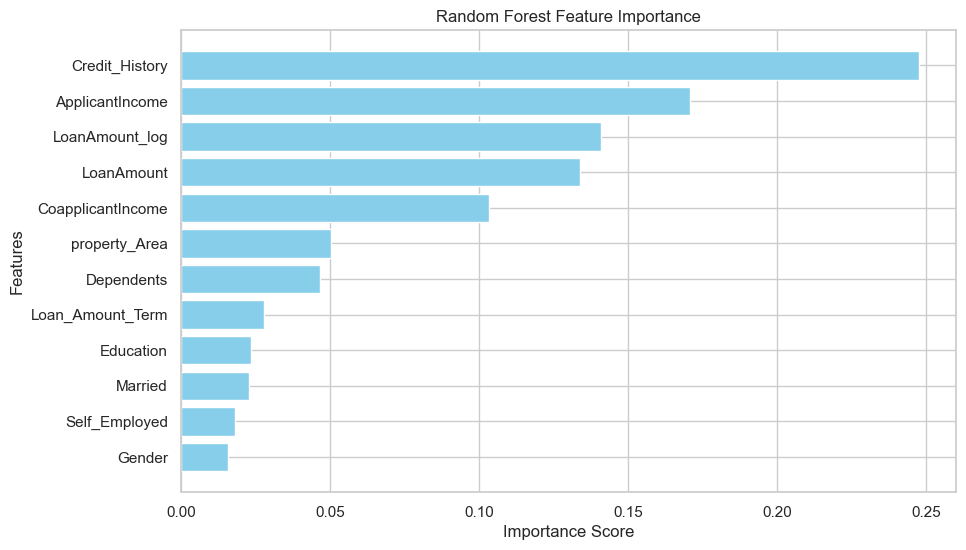

In [681]:
# Extract feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Random Forest Feature Importance:")
print(feature_importance_rf)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_rf['Feature'], feature_importance_rf['Importance'], color='skyblue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()  # Invert to show the most important feature at the top
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.81

Random Forest Results After Grid Search
Accuracy: 0.81
Confusion Matrix:
 [[ 24  27]
 [  8 125]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.47      0.58        51
           1       0.82      0.94      0.88       133

    accuracy                           0.81       184
   macro avg       0.79      0.71      0.73       184
weighted avg       0.80      0.81      0.79       184



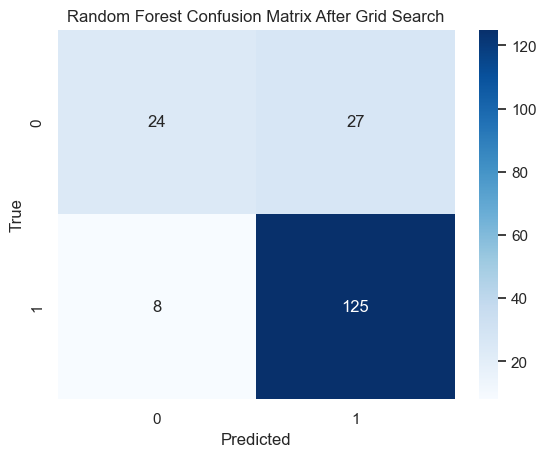

In [682]:
#Hyper-parameter tuning
# Define the parameter grid
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Create and fit the GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", round(best_score,2))

# Use the best model for predictions
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(x_val)

# Evaluate the model
print("\nRandom Forest Results After Grid Search")
print("Accuracy:", round(accuracy_score(y_val, y_pred_rf),2))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_val, y_pred_rf))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix After Grid Search')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [683]:
#Predicition using Hyper-parameter tuned Random Forest model
best_rf_model.fit(x_train, y_train)
pred_test_rf=best_rf_model.predict(test)
# make prediction on test set
print("Accuracy:", round(accuracy_score(y_val, y_pred_rf),2))
# take a look at the prediction
print(pred_test_rf)

Accuracy: 0.8097826086956522
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


R² (Coefficient of Determination): 0.0506
Mean Absolute Error (MAE): 0.1902
Mean Squared Error (MSE): 0.1902
Root Mean Squared Error (RMSE): 0.4361


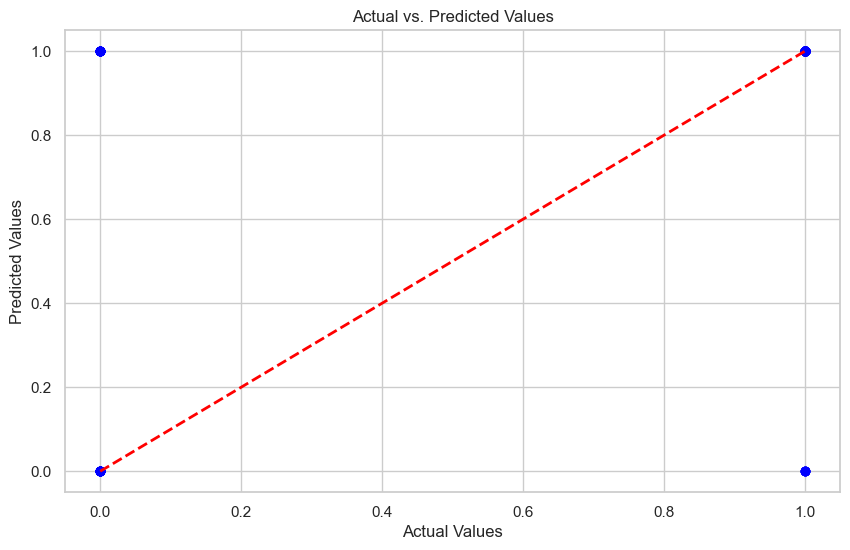

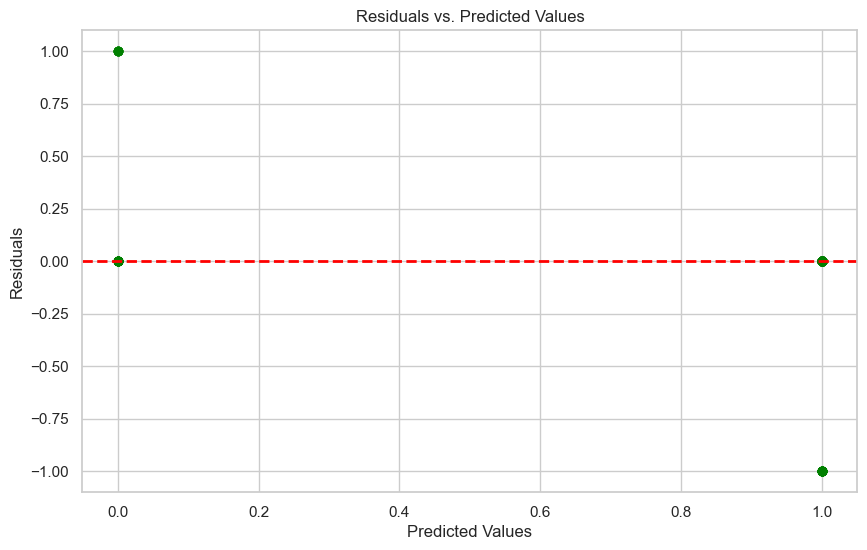

In [684]:
# Evaluation Metrics
r2 = r2_score(y_val, y_pred_rf)
mae = mean_absolute_error(y_val, y_pred_rf)
mse = mean_squared_error(y_val, y_pred_rf)
rmse = np.sqrt(mse)

# Print Metrics
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_rf, alpha=0.7, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot Residuals
residuals = y_val - y_pred_rf
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


<h><h>GRADIENT BOOST

Accuracy:  0.81
              precision    recall  f1-score   support

           0       0.74      0.49      0.59        51
           1       0.83      0.93      0.88       133

    accuracy                           0.81       184
   macro avg       0.78      0.71      0.73       184
weighted avg       0.80      0.81      0.80       184

AUC Score: 0.7964027716349698


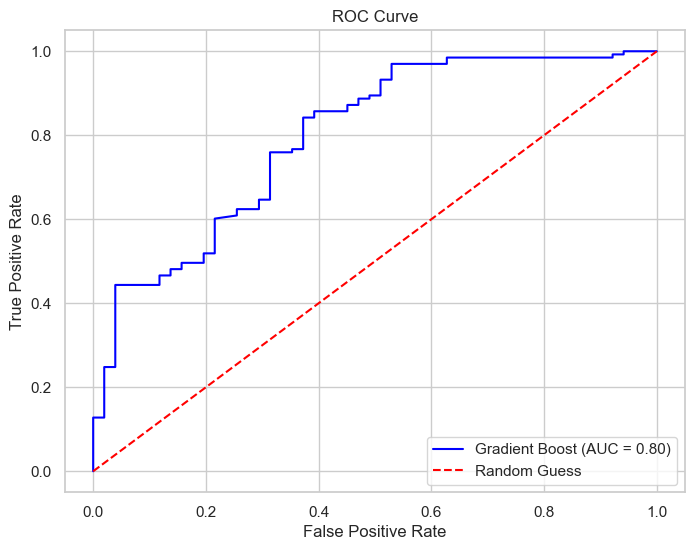

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [686]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_model = GradientBoostingClassifier(random_state=0)
gb_model.fit(x_train, y_train)

# make prediction
pred_cv_gb = gb_model.predict(x_val)
# calculate accuracy score
print("Accuracy: ",round(accuracy_score(y_val, pred_cv_gb),2))

print(classification_report(y_val, pred_cv_gb))

# Get predicted probabilities for ROC curve
probs_gb = gb_model.predict_proba(x_val)[:, 1]  

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, probs_gb)
auc_score = roc_auc_score(y_val, probs_gb)
print(f"AUC Score: {auc_score}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.plot(fpr, tpr, label=f"Gradient Boost (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# make prediction on test set
pred_test_gb = gb_model.predict(test)
print(pred_test_gb)



Feature Importance:
              Feature  Importance
9      Credit_History    0.433382
5     ApplicantIncome    0.187634
7          LoanAmount    0.086629
6   CoapplicantIncome    0.083109
11     LoanAmount_log    0.081131
10      property_Area    0.055183
2          Dependents    0.024348
8    Loan_Amount_Term    0.020640
3           Education    0.009623
1             Married    0.007349
4       Self_Employed    0.006679
0              Gender    0.004292


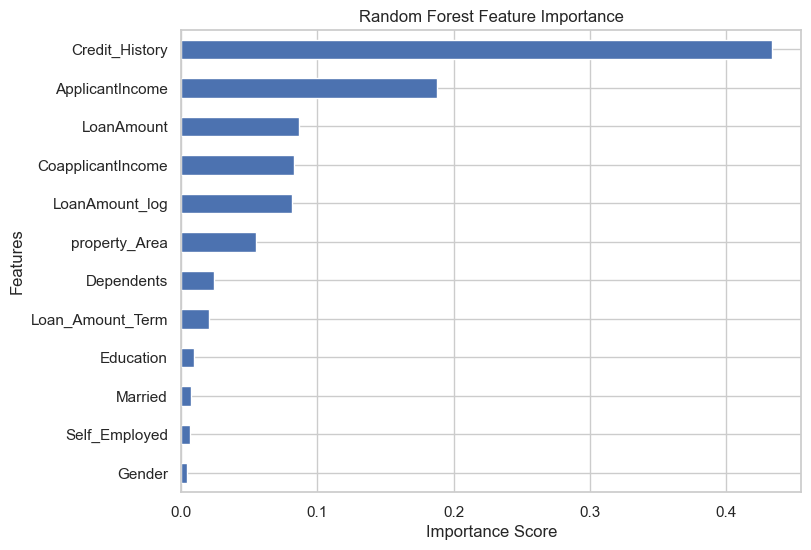

In [687]:
# Extract feature importance
feature_importance_gb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_gb)

# Plot feature importance
feature_importance_gb.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(8, 6))
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Gradient Boosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Gradient Boosting Best Cross-Validation Accuracy: 0.7902325581395349

Gradient Boosting Results
Accuracy: 0.8315217391304348
Confusion Matrix:
 [[ 22  29]
 [  2 131]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.98      0.89       133

    accuracy                           0.83       184
   macro avg       0.87      0.71      0.74       184
weighted avg       0.85      0.83      0.81       184



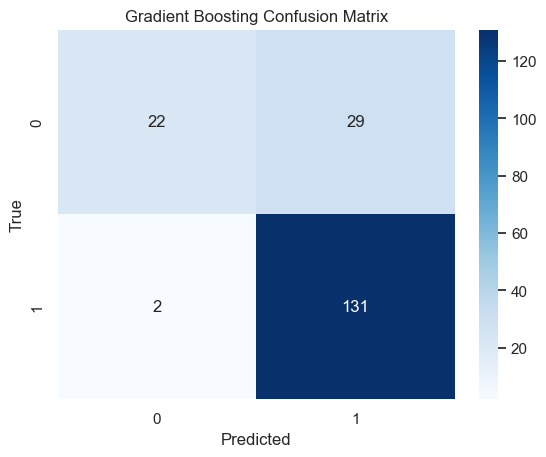

In [688]:
#Hyper-parameter tuning
# Define the parameter grid
param_grid_gb = {
    "n_estimators": [50, 100, 150],
    "learning_rate": [0.01, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.8, 1.0],
}

# Create and fit GridSearchCV
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search_gb.fit(x_train, y_train)

# Best parameters and score
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("\nGradient Boosting Best Parameters:", best_params_gb)
print("Gradient Boosting Best Cross-Validation Accuracy:", best_score_gb)

# Use the best model for predictions
best_gb_model = grid_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(x_val)

# Evaluate the model
print("\nGradient Boosting Results")
print("Accuracy:", accuracy_score(y_val, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_gb))
print("\nClassification Report:\n", classification_report(y_val, y_pred_gb))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [689]:
#Predicition using Hyper-parameter tuned Gradient Boost model
best_gb_model.fit(x_train, y_train)
pred_test_gb=best_gb_model.predict(test)
# make prediction on test set
print("Accuracy:", round(accuracy_score(y_val, y_pred_gb),2))
# take a look at the prediction
print(pred_test_gb)

Accuracy: 0.83
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


R² (Coefficient of Determination): 0.1591
Mean Absolute Error (MAE): 0.1685
Mean Squared Error (MSE): 0.1685
Root Mean Squared Error (RMSE): 0.4105


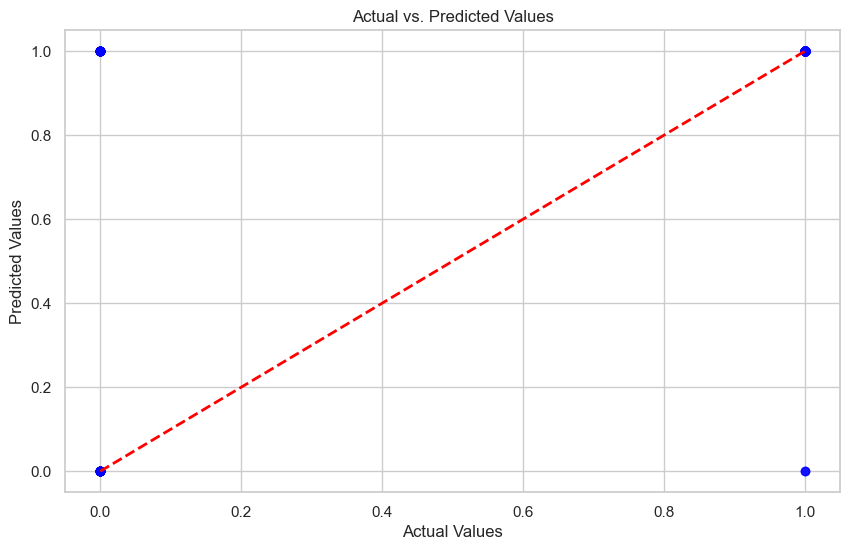

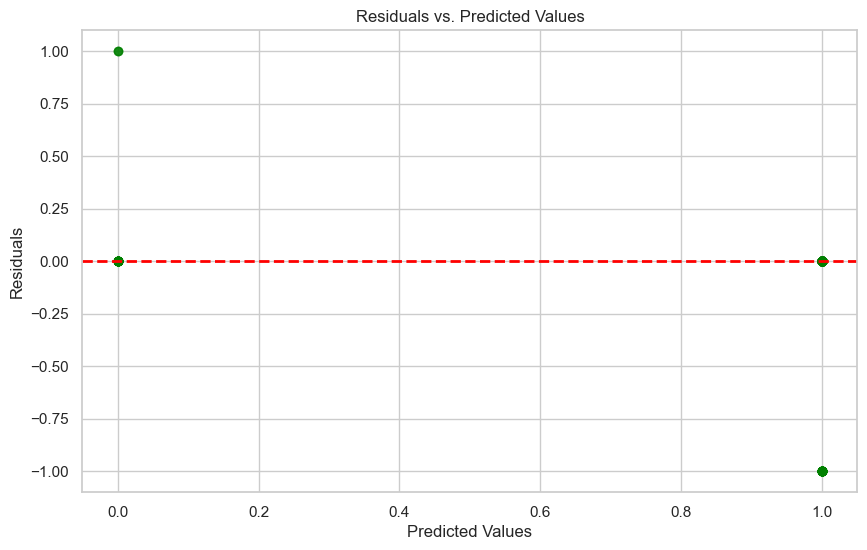

In [690]:
# Evaluation Metrics
r2 = r2_score(y_val, y_pred_gb)
mae = mean_absolute_error(y_val, y_pred_gb)
mse = mean_squared_error(y_val, y_pred_gb)
rmse = np.sqrt(mse)

# Print Metrics
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_gb, alpha=0.7, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot Residuals
residuals = y_val - y_pred_gb
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gb, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


<h><h>DECISION TREE

Accuracy:  0.71
              precision    recall  f1-score   support

           0       0.48      0.53      0.50        51
           1       0.81      0.78      0.80       133

    accuracy                           0.71       184
   macro avg       0.65      0.66      0.65       184
weighted avg       0.72      0.71      0.72       184

AUC Score: 0.6556833259619637


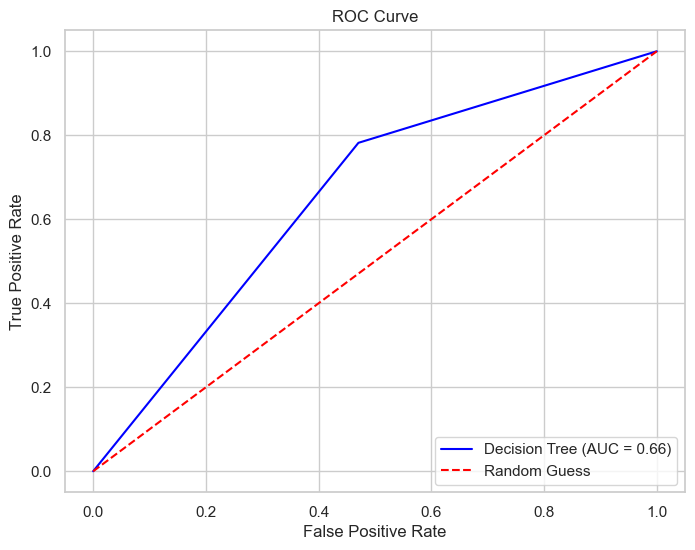

[1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1
 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0
 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1]


In [692]:
from sklearn.tree import DecisionTreeClassifier

# Define the model
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train, y_train)

# make prediction
pred_cv_dt = dt_model.predict(x_val)
# calculate accuracy score
print("Accuracy: ",round(accuracy_score(y_val, pred_cv_dt),2))# make prediction

print(classification_report(y_val, pred_cv_dt))

# Get predicted probabilities for ROC curve
probs_dt = dt_model.predict_proba(x_val)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, probs_dt)
auc_score = roc_auc_score(y_val, probs_dt)
print(f"AUC Score: {auc_score}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# make prediction on test set
pred_test_dt = dt_model.predict(test)
# take a look at the prediction
print(pred_test_dt)

Decision Tree Feature Importance:
              Feature  Importance
9      Credit_History    0.290031
5     ApplicantIncome    0.208110
7          LoanAmount    0.130237
6   CoapplicantIncome    0.102689
11     LoanAmount_log    0.100457
2          Dependents    0.050239
10      property_Area    0.049243
4       Self_Employed    0.024113
3           Education    0.018664
8    Loan_Amount_Term    0.013310
0              Gender    0.008804
1             Married    0.004103


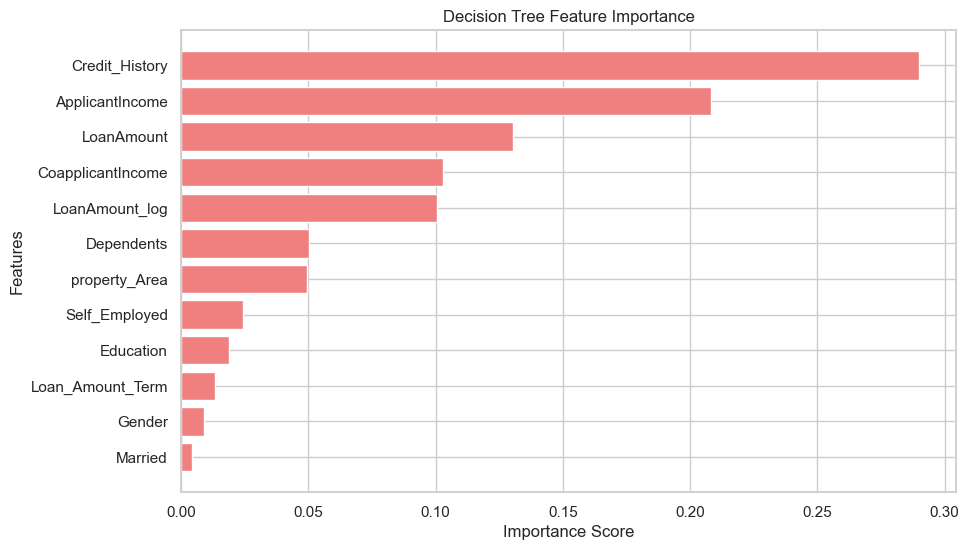

In [693]:
# Extract feature importance
feature_importance_dt = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Decision Tree Feature Importance:")
print(feature_importance_dt)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'], color='lightcoral')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Decision Tree Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Best Cross-Validation Accuracy: 0.7809575923392613

Decision Tree Results
Accuracy: 0.8152173913043478
Confusion Matrix:
 [[ 22  29]
 [  5 128]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.43      0.56        51
           1       0.82      0.96      0.88       133

    accuracy                           0.82       184
   macro avg       0.82      0.70      0.72       184
weighted avg       0.82      0.82      0.79       184



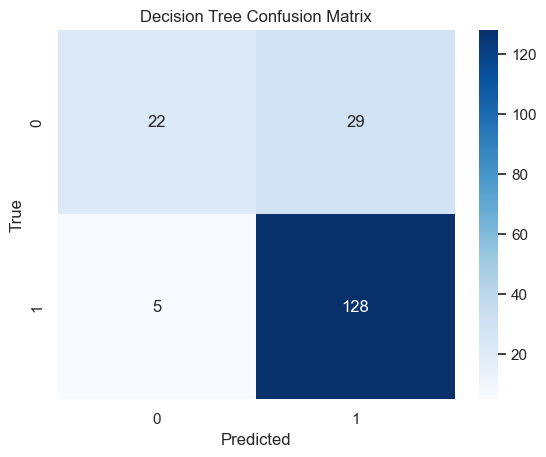

In [694]:
#Hyper-parameter tuning
# Define the parameter grid
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Create and fit GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search_dt.fit(x_train, y_train)

# Best parameters and score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("\nDecision Tree Best Parameters:", best_params_dt)
print("Decision Tree Best Cross-Validation Accuracy:", best_score_dt)

# Use the best model for predictions
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt = best_dt_model.predict(x_val)
best_dt_model.fit(x_train, y_train)
# Evaluate the model
print("\nDecision Tree Results")
print("Accuracy:", accuracy_score(y_val, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_val, y_pred_dt))

# Plot Confusion Matrix
sns.heatmap(confusion_matrix(y_val, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [695]:
#Predicition using Hyper-parameter tuned Decision Tree model
best_dt_model.fit(x_train, y_train)
pred_test_dt=best_dt_model.predict(test)
# make prediction on test set
print("Accuracy:", round(accuracy_score(y_val, y_pred_dt),2))
# take a look at the prediction
print(pred_test_dt)

Accuracy: 0.82
[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


R² (Coefficient of Determination): 0.0777
Mean Absolute Error (MAE): 0.1848
Mean Squared Error (MSE): 0.1848
Root Mean Squared Error (RMSE): 0.4299


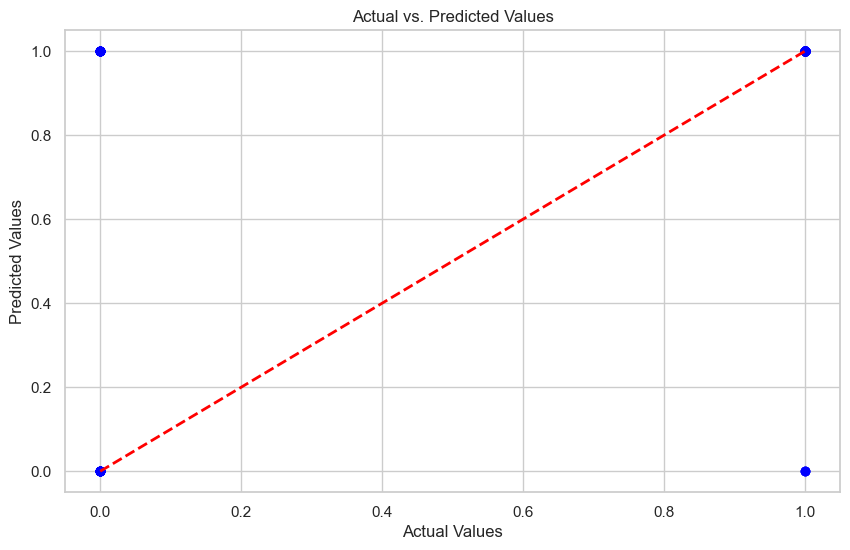

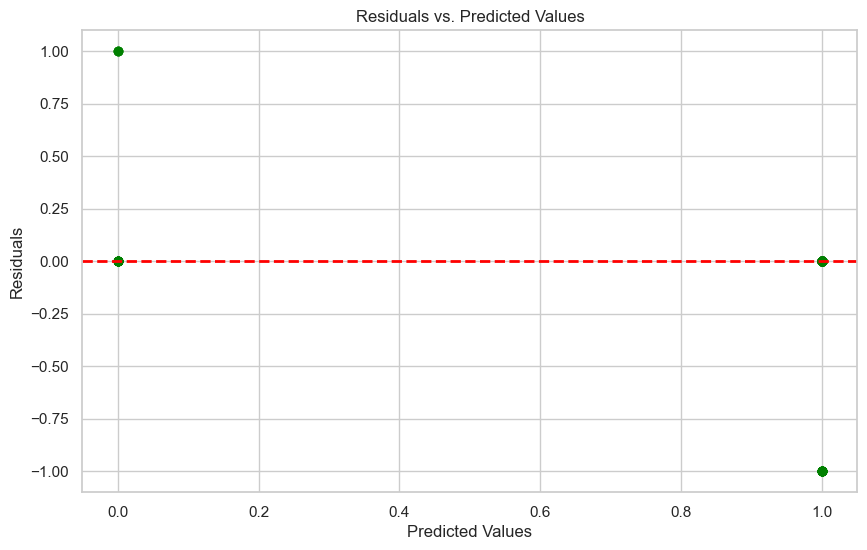

In [696]:
# Evaluation Metrics
r2 = r2_score(y_val, y_pred_dt)
mae = mean_absolute_error(y_val, y_pred_dt)
mse = mean_squared_error(y_val, y_pred_dt)
rmse = np.sqrt(mse)

# Print Metrics
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_dt, alpha=0.7, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot Residuals
residuals = y_val - y_pred_dt
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dt, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


<h><h>k-NEAREST NEIGHBOUR

Accuracy:  0.625
              precision    recall  f1-score   support

           0       0.29      0.24      0.26        51
           1       0.73      0.77      0.75       133

    accuracy                           0.62       184
   macro avg       0.51      0.50      0.50       184
weighted avg       0.60      0.62      0.61       184

AUC Score: 0.5189444198732125


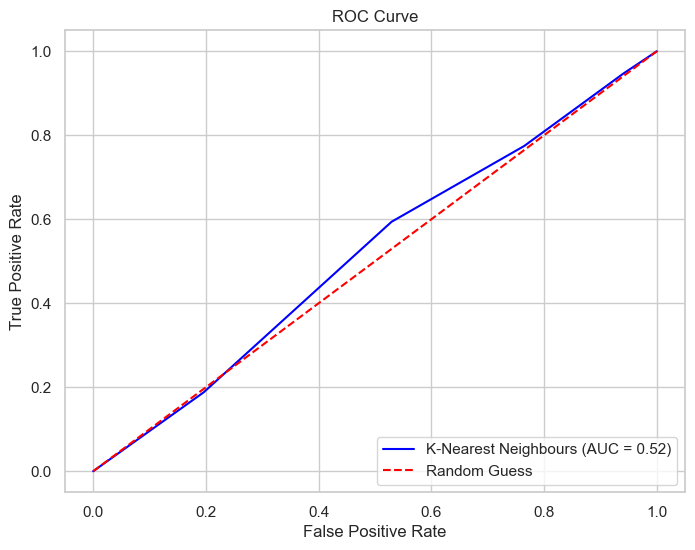


Prediction
[1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0
 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1]


In [698]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

# make prediction
pred_cv_knn = knn_model.predict(x_val)
# calculate accuracy score
print("Accuracy: ",accuracy_score(y_val, pred_cv_knn))# make prediction
print(classification_report(y_val, pred_cv_knn))

# Get predicted probabilities for ROC curve
probs_knn = knn_model.predict_proba(x_val)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_val, probs_knn)
auc_score = roc_auc_score(y_val, probs_knn)
print(f"AUC Score: {auc_score}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.plot(fpr, tpr, label=f"K-Nearest Neighbours (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# make prediction on test set
pred_test_knn = knn_model.predict(test)
# take a look at the prediction
print("\nPrediction")
print(pred_test_knn)


Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters (k-NN): {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
Best Cross-Validation Accuracy (k-NN): 0.671326949384405

k-NN Results After Grid Search
Accuracy: 0.6467391304347826
Confusion Matrix:
 [[  7  44]
 [ 21 112]]

Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.14      0.18        51
           1       0.72      0.84      0.78       133

    accuracy                           0.65       184
   macro avg       0.48      0.49      0.48       184
weighted avg       0.59      0.65      0.61       184



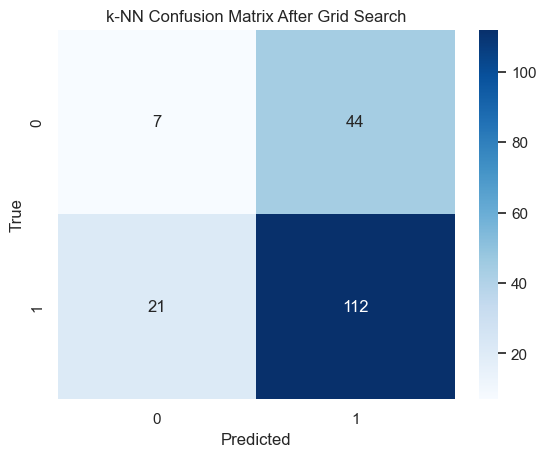

In [699]:
#Hyper-parametr tuning
# Define the parameter grid
param_grid_knn = {
    "n_neighbors": [3, 5, 7, 10],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
}

# Create and fit the GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=5, scoring="accuracy", verbose=1, n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

# Get the best hyperparameters and score
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("\nBest Parameters (k-NN):", best_params_knn)
print("Best Cross-Validation Accuracy (k-NN):", best_score_knn)

# Use the best model for predictions
best_knn_model = grid_search_knn.best_estimator_
y_pred_knn = best_knn_model.predict(x_val)

# Evaluate the model
print("\nk-NN Results After Grid Search")
print("Accuracy:", accuracy_score(y_val, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_val, y_pred_knn))

# Plot the confusion matrix
sns.heatmap(confusion_matrix(y_val, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('k-NN Confusion Matrix After Grid Search')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [700]:
#Predicition using Hyper-parameter tuned Decision Tree model
best_knn_model.fit(x_train, y_train)
pred_test_knn=best_knn_model.predict(test)
# make prediction on test set
print("Accuracy:", round(accuracy_score(y_val, y_pred_knn),2))
# take a look at the prediction
print(pred_test_knn)

Accuracy: 0.65
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]


R² (Coefficient of Determination): -0.7632
Mean Absolute Error (MAE): 0.3533
Mean Squared Error (MSE): 0.3533
Root Mean Squared Error (RMSE): 0.5944


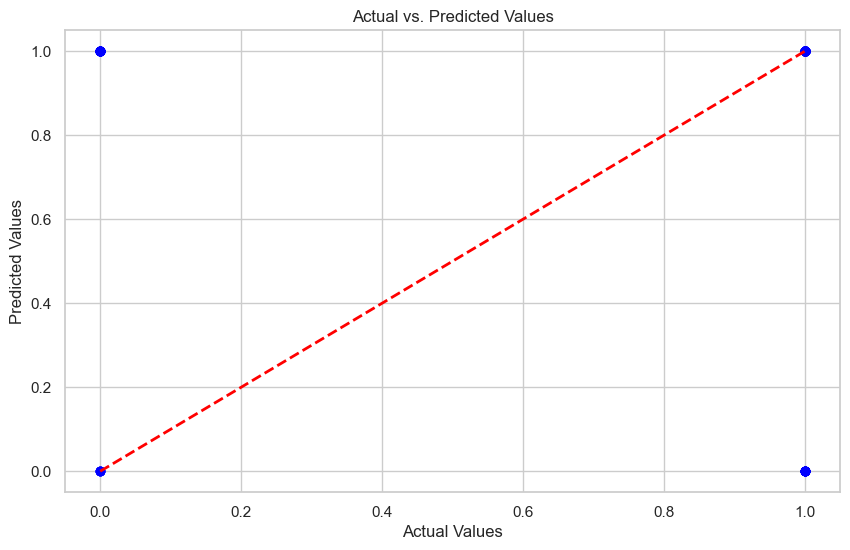

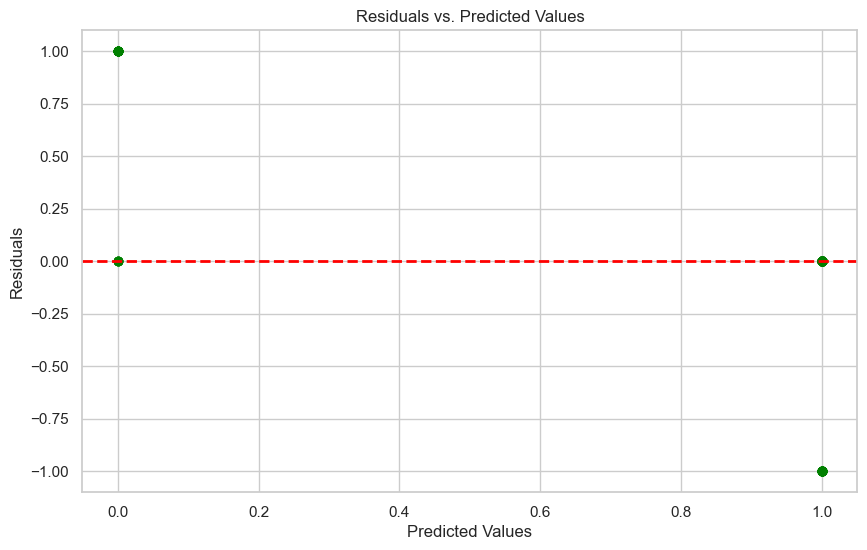

In [701]:
# Evaluation Metrics
r2 = r2_score(y_val, y_pred_knn)
mae = mean_absolute_error(y_val, y_pred_knn)
mse = mean_squared_error(y_val, y_pred_knn)
rmse = np.sqrt(mse)

# Print Metrics
print(f"R² (Coefficient of Determination): {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Plot Actual vs. Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred_knn, alpha=0.7, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

# Plot Residuals
residuals = y_val - y_pred_knn
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_knn, residuals, alpha=0.7, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()


In [702]:
test_copy=test.copy()
test_copy['Loan_Status'] = pred_test_lr
# Save the DataFrame with predictions to a new CSV file
test_copy.to_csv('CPC_Assignment files/test_with_predictions.csv', index=False)